## Project 01

**Belle Erhardt**

**DSCI 35600 - Machine Learning**

## Part A: Import Packages and Load Dataset

In the cell below, import the following packages using the standard aliases: `numpy`, `matplotlib.pyplot`, and `pandas`. Also import the following classes and functions from `sklearn`: `train_test_split`, `LogisticRegression`, `KNeighborsClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier`, `StandardScaler`, and `OneHotEncoder`.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

Use `pandas` to load the contents of the tab-separated file `hw_11_data.txt` into a dataframe called `df`. Display the first 10 rows of this dataframe.

In [2]:
df = pd.read_csv('Project01_data.txt', sep='\t')
df.head(10)

,F1,F2,F3,F4,F5,y
0,15.69,-0.771,550.880459,P,D,0
1,-16.81,1.959,588.523801,Q,C,3
2,21.09,-1.550,660.881834,P,B,2
3,15.64,-1.623,374.414543,Q,C,0
4,14.25,1.426,446.714120,Q,B,0
5,21.54,1.231,525.126448,P,D,2
6,-14.05,1.608,343.264320,P,B,3
7,-21.52,-1.858,549.753447,Q,B,1
8,12.31,-0.941,507.148376,Q,D,0
9,-24.83,-1.940,627.040100,Q,B,1


Your goal in this assignment will be to use features F1 - F6 to predict one of four possible values for y: 0, 1, 2, or 3. 

## Part B: Preparing the Data

In the cell below, create the following arrays:

* `X_num` should contain the columns of `df` associated with numerical variables. 
* `X_cat` should contain the columns of `df` associated with categorical variables. 
* `y` should be a 1D array contain the values of the label, `y`. 

Print the shapes of these three arrays.

In [5]:
X_num = df.iloc[:,:3].values
X_cat = df.iloc[:,[3,4]].values
y = df.iloc[:,-1]

print(X_num.shape)
print(X_cat.shape)
print(y.shape)

(467, 3)
(467, 2)
(467,)


#### Numerical Features
Split `Xnum` into training and validation sets called `X_num_train` and `X_num_val`. Use an 80/20 split, and set `random_state=1`. 

Then use the `StandardScaler` class to scale the numerical data. Name the resulting arrays `X_sca_train` and `X_sca_val`. Print the shape of these two arrays. 

In [12]:
X_num_train, X_num_val, y_num_train, y_num_val = train_test_split(X_num, y, test_size=0.2, random_state=1)
s_scaler = StandardScaler()

X_sca_train = s_scaler.fit_transform(X_num_train)
X_sca_val = s_scaler.fit_transform(X_num_val)

#### Categorical Features

Use the `OneHotEncoder` class to encode the categorical feature array (setting `sparse=False`). Store the results in an array called `X_enc`. 

Split `X_enc` into training and validation sets called `X_enc_train` and `X_enc_val`. Use an 80/20 split, and set `random_state=1`. Print the shapes of these two arrays.

In [13]:
enc = OneHotEncoder(sparse=False)
X_enc = enc.fit_transform(X_cat)

X_enc_train, X_enc_val, y_enc_train, y_enc_val = train_test_split(X_enc, y, test_size=0.2, random_state=1)


#### Combine Numerical and Categorial Features

Use `np.hstack()` to combine `X_sca_train` and `X_enc_train` into an array called `X_train`. Then combine `X_sca_val` and `X_enc_val` into an array called `X_val`. Print the shapes of the two new arrays.

In [23]:
X_train = np.hstack([X_sca_train, X_enc_train])
X_val = np.hstack([X_sca_val, X_enc_val])
print(X_val.shape)
print(X_train.shape)

(94, 9)
(373, 9)


## Part C: Logistic Regression Model

In the cell below, create and fit several logistic regression models, each with a different value for the regularization parameter `C`. In particular, consider 100 models with `C=10**k`, where `k` ranges from -4 to 0. For each model, log the training and validation accuracies in separate lists, and then plot these lists against `k`. Display a legend for your plot. 

Set `solver='lbfgs'` and `multi_class='ovr'` when creating your logistic regression models. 

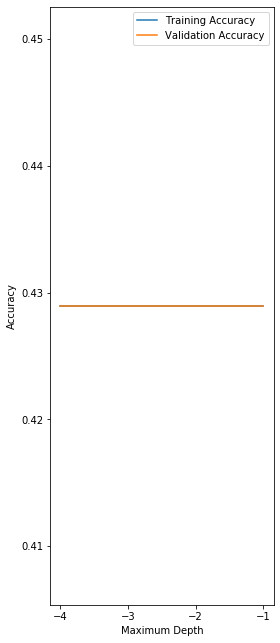

In [63]:
validation_accuracy = []
training_accuracy = []
rng = range(-4 ,0)

for d in rng:
    model = LogisticRegression(C=10** k,solver='lbfgs', random_state=1, multi_class='ovr' )
    model.fit(X_train, y_num_train)
    model.fit(X_val, y_num_val)
    validation_accuracy.append(model.score(X_train, y_num_train))
    training_accuracy.append(model.score(X_train, y_num_train))
    

    
plt.figure(figsize=([4,11]))
plt.plot(rng, training_accuracy, label='Training Accuracy')
plt.plot(rng, validation_accuracy, label='Validation Accuracy')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.xticks(rng)
plt.legend()
plt.show()

Use `np.argmax` to find the value of `k` that results in the largest validation accuracy. Print this result.

In [29]:
k = np.argmax(validation_accuracy)-4
print(k)

-1


Create a logistic regression model using the previously determined value for the regularization parameter. Print the training and validation accuracies for this model, clearly indicating which is which.

In [50]:
logisticM = LogisticRegression(C=10** -1,solver='lbfgs', random_state=1, multi_class='ovr' )
logisticM.fit(X_train, y_num_train)
logisticM.fit(X_val, y_num_val)
print("Validation Accuracies:", logisticM.score(X_train, y_num_train))
print("Training Accuracies:",logisticM.score(X_train, y_num_train))


Validation Accuracies: 0.3672922252010724
Training Accuracies: 0.3672922252010724


## Part D: Decision Tree Model

In the cell below, create and fit several decision tree models, each with a different value for the `max_depth` parameter. In particular, consider models for every value of max_depth from 1 to 20. For each model, log the training and validation accuracies in separate lists, and then plot these lists against the max depth. Display a legend for your plot. 

Set a seed of 1 prior to training each of your models. This should be inside of your loop. 

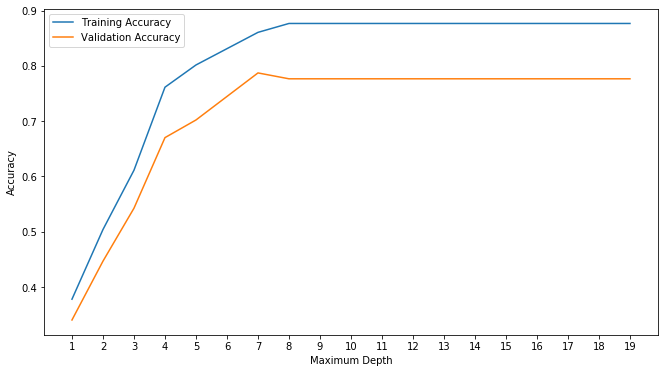

In [34]:
training_acc = []
validation_acc = []

rng = range(1,20)

for d in rng:
    temp_mod = DecisionTreeClassifier(max_depth=d, min_samples_leaf=10, criterion='gini', random_state=1)
    temp_mod.fit(X_train, y_num_train)
    training_acc.append(temp_mod.score(X_train, y_num_train))
    validation_acc.append(temp_mod.score(X_val, y_num_val))

plt.figure(figsize=([11, 6]))
plt.plot(rng, training_acc, label='Training Accuracy')
plt.plot(rng, validation_acc, label='Validation Accuracy')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.xticks(rng)
plt.legend()
plt.show()

Use `np.argmax` to find the value of `max_depth` that results in the largest validation accuracy. Print this result. 

In [39]:
max_depth = validation_acc[np.argmax(validation_acc)]
print(max_depth)

0.7872340425531915
6


Create a tree model using the previously determined value of `max_depth`. Print the training and validation accuracies for this model, clearly indicating which is which.

Set a seed of 1 at the beginning of this cell.

In [42]:
TreeModel = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, criterion='gini', random_state=1)
TreeModel.fit(X_train, y_num_train)

print("Validation Accuracies:", TreeModel.score(X_val, y_num_val))
print("Training Accuracies:",TreeModel.score(X_train, y_num_train))


Validation Accuracies: 0.7446808510638298
Training Accuracies: 0.8310991957104558


## Part E: Random Forest Model

In the cell below, create and fit several random forest models, each with a different value for the `max_depth` parameter. In particular, consider models for every value of max_depth from 1 to 20. Set `n_estimators=200` for each model. After training each model, log the training and validation accuracies in seperate lists, and then plot these lists against the max depth. Label your axes, and display a legend for your plot. 

Set a seed of 1 prior to training each of your models. This should be inside of your loop. 

In [46]:
from sklearn.ensemble import BaggingClassifier
t_acc = []
v_acc = []

np.random.seed(1)
rng = range(1,20)

for d in rng:
    #temp_mod = DecisionTreeClassifier(max_depth=d, min_samples_leaf=10, criterion='gini', random_state=1)
    rfmodel = BaggingClassifier(DecisionTreeClassifier(max_depth=d, splitter='random', max_leaf_nodes=32),
    n_estimators=200, max_samples=0.5, bootstrap=True, oob_score = True)

    rfmodel.fit(X_train, y_num_train)
    
    t_acc.append(rfmodel.score(X_train, y_num_train))
    v_acc.append(rfmodel.score(X_val, y_num_val))
    

print('Out of bag score:', rfmodel.oob_score_)

print(t_acc)
print(v_acc)

Out of bag score: 0.9276139410187667
[0.38605898123324395, 0.868632707774799, 0.9329758713136729, 0.9463806970509383, 0.9544235924932976, 0.9758713136729222, 0.967828418230563, 0.967828418230563, 0.9705093833780161, 0.9705093833780161, 0.9705093833780161, 0.9731903485254692, 0.9651474530831099, 0.9705093833780161, 0.9731903485254692, 0.9731903485254692, 0.9705093833780161, 0.9785522788203753, 0.967828418230563]
[0.3829787234042553, 0.8085106382978723, 0.8829787234042553, 0.9042553191489362, 0.8936170212765957, 0.8936170212765957, 0.925531914893617, 0.9042553191489362, 0.8936170212765957, 0.9148936170212766, 0.8936170212765957, 0.9042553191489362, 0.9042553191489362, 0.8829787234042553, 0.9042553191489362, 0.9042553191489362, 0.8936170212765957, 0.9042553191489362, 0.9042553191489362]


Use `np.argmax` to find the value of `max_depth` that results in the largest validation accuracy. Print this result. 

In [47]:
max_depth = np.argmax(v_acc)
print(max_depth)

6


Create a random forest model using the previously determined value of `max_depth` and `n_estimators=200`. Print the training and validation accuracies for this model, clearly indicating which is which.

Set a seed of 1 at the beginning of this cell.

In [48]:
np.random.seed(1)
rfmodel2 = BaggingClassifier(DecisionTreeClassifier(max_depth=6, splitter='random', max_leaf_nodes=32),n_estimators=200, max_samples=0.5, bootstrap=True, oob_score = True)
rfmodel2.fit(X_train, y_num_train)

print("Validation Accuracies:", rfmodel2.score(X_val, y_num_val))
print("Training Accuracies:",rfmodel2.score(X_train, y_num_train))

Validation Accuracies: 0.9042553191489362
Training Accuracies: 0.9571045576407506


## Part F: Summary

Print the validation accuracies for each of the three models, clearly indicating which is which. 

In [54]:
print("Logistic Regression Calculations \nValidation Accuracy:", logisticM.score(X_train, y_num_train))
print("Training Accuracy:",logisticM.score(X_train, y_num_train))

print("Decision Tree Calculations \nValidation Accuracy:", TreeModel.score(X_val, y_num_val))
print("Training Accuracy:",TreeModel.score(X_train, y_num_train))

print("Random Forest Model Calculations \nValidation Accuracy:", rfmodel2.score(X_val, y_num_val))
print("Training Accuracy:",rfmodel2.score(X_train, y_num_train))

Logistic Regression Calculations 
Validation Accuracy: 0.3672922252010724
Training Accuracy: 0.3672922252010724
Decision Tree Calculations 
Validation Accuracy: 0.7446808510638298
Training Accuracy: 0.8310991957104558
Random Forest Model Calculations 
Validation Accuracy: 0.9042553191489362
Training Accuracy: 0.9571045576407506
